<a href="https://colab.research.google.com/github/david-paradis/hip-surgery-proms-ml/blob/main/Hip_Surgery_Impact_on_Quality_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Analysis of Hip Replacement Surgery Outcomes

## Executive Summary

This report presents an unsupervised learning analysis of patient outcomes following hip replacement surgery. Using data from the NHS Patient Reported Outcome Measures (PROMs) program, we applied exploratory data analysis techniques and unsupervised learning methods to identify distinct patient groups based on their pre-operative conditions and post-operative outcomes. Our analysis revealed five distinct patient clusters that provide valuable insights into the relationship between baseline condition and improvement potential. These findings can help guide pre-operative counseling and set appropriate expectations for patients considering hip replacement surgery.

## 1. Introduction and Problem Statement

Hip replacement surgery is one of the most common orthopedic procedures performed worldwide, with the aim of reducing pain and improving quality of life for patients with hip joint issues. While the surgery is generally considered successful, outcomes can vary significantly between patients. Understanding which factors contribute to these variations and identifying distinct patient profiles can help optimize patient selection, set realistic expectations, and potentially improve surgical outcomes.

This unsupervised learning analysis aims to:
1. Identify distinct patient groups based on pre-operative conditions and post-operative outcomes
2. Determine which pre-operative factors are most predictive of post-operative improvement
3. Explore the relationship between objective improvement measures and patient satisfaction
4. Provide insights that could help guide clinical decision-making and patient counseling

## 2. Data Collection and Description

### Data Source
The data used in this analysis comes from the NHS (National Health Service) Patient Reported Outcome Measures (PROMs) program for the year 2023-24. The PROMs program collects data on patient-reported health outcomes before and after four common elective surgeries, including hip replacement. The specific dataset used is "Hip Replacement ICB 2324.csv".

### PROMs
PROMs are standardized, validated survey tools that assess health outcomes reported by patients, in areas such as general health and quality of life, or around specific symptoms, functional ability and physical, mental and social health.

### Data Description
The dataset includes:
- Patient demographics (age band, gender)
- Procedure details (revision flag, provider code)
- Comorbidities (heart disease, high blood pressure, stroke, etc.)
- Pre-operative and post-operative patient-reported outcome measures:
  - Oxford Hip Score (OHS): A validated 12-item questionnaire specific to hip function (0-48 scale)
  - EQ-5D Index: A standardized measure of health status (-0.594 to 1 scale)
  - Patient satisfaction scores



In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Load the hip replacement data
hip_data = pd.read_csv('Hip Replacement ICB 2324 upload.csv')

# Display basic information about the dataset
print("Dataset shape:", hip_data.shape)
print("\nFirst few rows:")
print(hip_data.head())

# Get column information
print("\nColumn information:")
hip_data.info()

# Display summary statistics
print("\nSummary statistics:")
print(hip_data.describe())

# Check for missing values
print("\nMissing values per column:")
print(hip_data.isnull().sum())

<ipython-input-1-67a11f61318d>:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  hip_data = pd.read_csv('Hip Replacement ICB 2324 upload.csv')


Dataset shape: (15107, 81)

First few rows:
  Provider Code        Procedure  Revision Flag     Year Age Band Gender  \
0           00L  Hip Replacement              0  2023/24        *      *   
1           00L  Hip Replacement              1  2023/24        *      *   
2           00L  Hip Replacement              0  2023/24        *      *   
3           00L  Hip Replacement              0  2023/24        *      *   
4           00L  Hip Replacement              0  2023/24        *      *   

   Pre-Op Q Assisted  Pre-Op Q Assisted By  Pre-Op Q Symptom Period  \
0                  2                     0                        2   
1                  2                     0                        2   
2                  2                     0                        3   
3                  1                     0                        1   
4                  2                     0                        2   

   Pre-Op Q Previous Surgery  ...  Hip Replacement Post-Op Q Transport  

## 3. Exploratory Data Analysis (EDA)

Our exploratory data analysis focuses on understanding the distribution of pre-operative and post-operative scores, the impact of patient demographics and comorbidities on outcomes, and the relationship between objective improvement measures and subjective satisfaction.

### 3.1 Initial Data Examination & Categorical Variables



In [2]:
# Get a better understanding of the columns
print("Column names:")
for i, col in enumerate(hip_data.columns):
    print(f"{i}: {col}")

# Examine unique values in categorical columns
categorical_cols = ['Provider Code', 'Procedure', 'Revision Flag', 'Year', 'Age Band', 'Gender']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(hip_data[col].value_counts().head(10))
    print(f"Total unique values: {hip_data[col].nunique()}")

# Checking for columns that might represent scores or metrics
score_cols = [col for col in hip_data.columns if 'Score' in col]
print("\nScore columns:")
for col in score_cols:
    print(f"\n{col}:")
    print(hip_data[col].describe())


Column names:
0: Provider Code
1: Procedure
2: Revision Flag
3: Year
4: Age Band
5: Gender
6: Pre-Op Q Assisted
7: Pre-Op Q Assisted By
8: Pre-Op Q Symptom Period
9: Pre-Op Q Previous Surgery
10: Pre-Op Q Living Arrangements
11: Pre-Op Q Disability
12: Heart Disease
13: High Bp
14: Stroke
15: Circulation
16: Lung Disease
17: Diabetes
18: Kidney Disease
19: Nervous System
20: Liver Disease
21: Cancer
22: Depression
23: Arthritis
24: Pre-Op Q Mobility
25: Pre-Op Q Self-Care
26: Pre-Op Q Activity
27: Pre-Op Q Discomfort
28: Pre-Op Q Anxiety
29: Pre-Op Q EQ5D Index Profile
30: Pre-Op Q EQ5D Index
31: Post-Op Q Assisted
32: Post-Op Q Assisted By
33: Post-Op Q Living Arrangements
34: Post-Op Q Disability
35: Post-Op Q Mobility
36: Post-Op Q Self-Care
37: Post-Op Q Activity
38: Post-Op Q Discomfort
39: Post-Op Q Anxiety
40: Post-Op Q Satisfaction
41: Post-Op Q Sucess
42: Post-Op Q Allergy
43: Post-Op Q Bleeding
44: Post-Op Q Wound
45: Post-Op Q Urine
46: Post-Op Q Further Surgery
47: Post-Op 

### 3.2 Distribution of Pre-operative and Post-operative Scores (OHS)

A key aspect of our analysis is examining how hip replacement surgery impacts quality of life metrics. Here we analyze the Oxford Hip Score (OHS) before and after surgery.


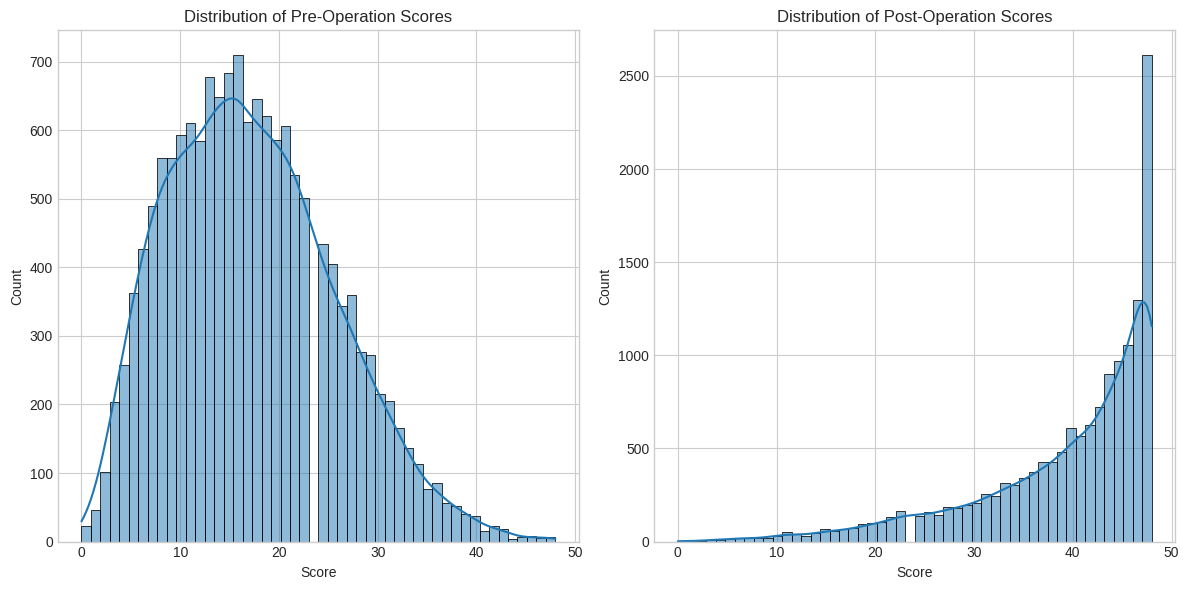


Score Improvement Statistics:
count    14819.000000
mean        22.307916
std         10.318716
min        -33.000000
25%         16.000000
50%         23.000000
75%         30.000000
max         47.000000
Name: Score Improvement, dtype: float64


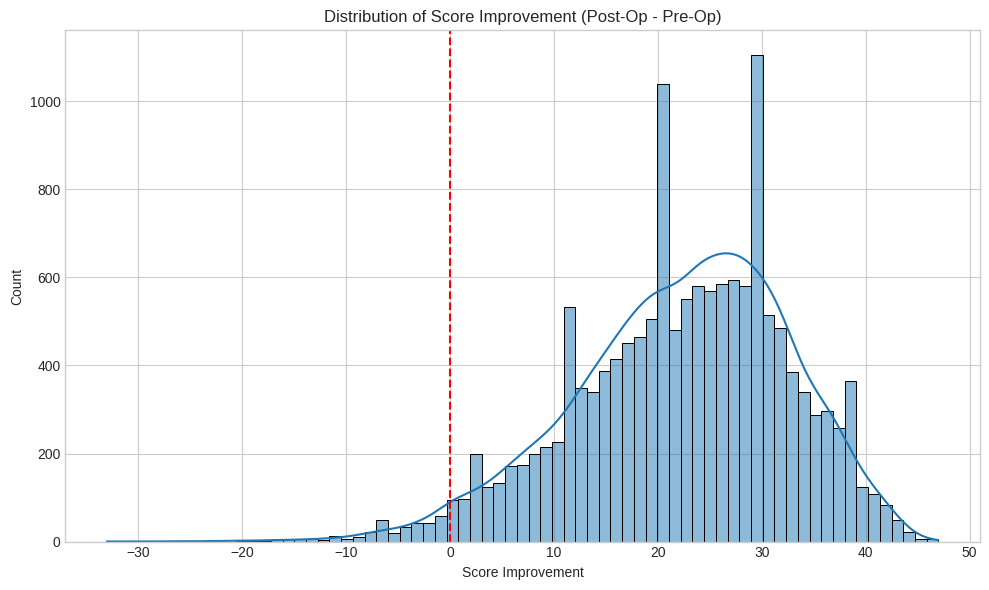

In [3]:
# Explore pre and post operation scores
preop_score = 'Hip Replacement Pre-Op Q Score'
postop_score = 'Hip Replacement Post-Op Q Score'

# Check distribution of pre and post operation scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(hip_data[preop_score].dropna(), kde=True)
plt.title('Distribution of Pre-Operation Scores')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(hip_data[postop_score].dropna(), kde=True)
plt.title('Distribution of Post-Operation Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate improvement in scores
hip_data['Score Improvement'] = hip_data[postop_score] - hip_data[preop_score]

# Display stats about improvement
print("\nScore Improvement Statistics:")
print(hip_data['Score Improvement'].describe())

# Plot the improvement
plt.figure(figsize=(10, 6))
sns.histplot(hip_data['Score Improvement'].dropna(), kde=True)
plt.title('Distribution of Score Improvement (Post-Op - Pre-Op)')
plt.xlabel('Score Improvement')
plt.ylabel('Count')
plt.axvline(x=0, color='r', linestyle='--')  # Add line at zero
plt.tight_layout()
plt.show()


### 3.3 Analysis by Age Group

Age is an important factor that may influence surgical outcomes. Here we examine how improvement varies across different age bands.


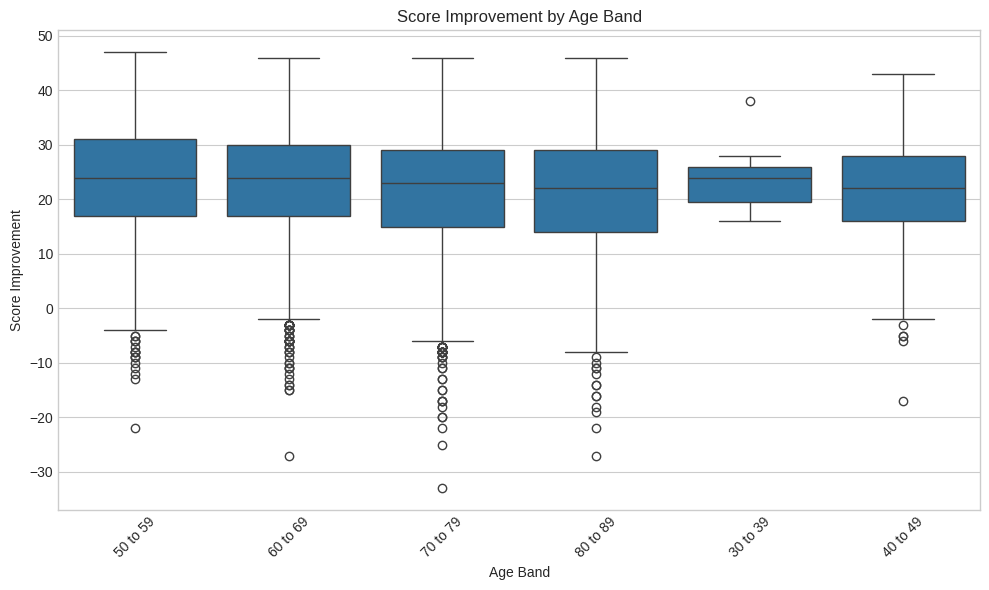

In [4]:

# Analyze improvement by age band
plt.figure(figsize=(10, 6))
# Filter out '*' values from Age Band
age_data = hip_data[hip_data['Age Band'] != '*']
sns.boxplot(x='Age Band', y='Score Improvement', data=age_data)
plt.title('Score Improvement by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Score Improvement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.4 Analysis of EQ-5D Index Scores

The EQ-5D Index is a standardized measure of health status. We analyze how this metric changes after hip replacement surgery.


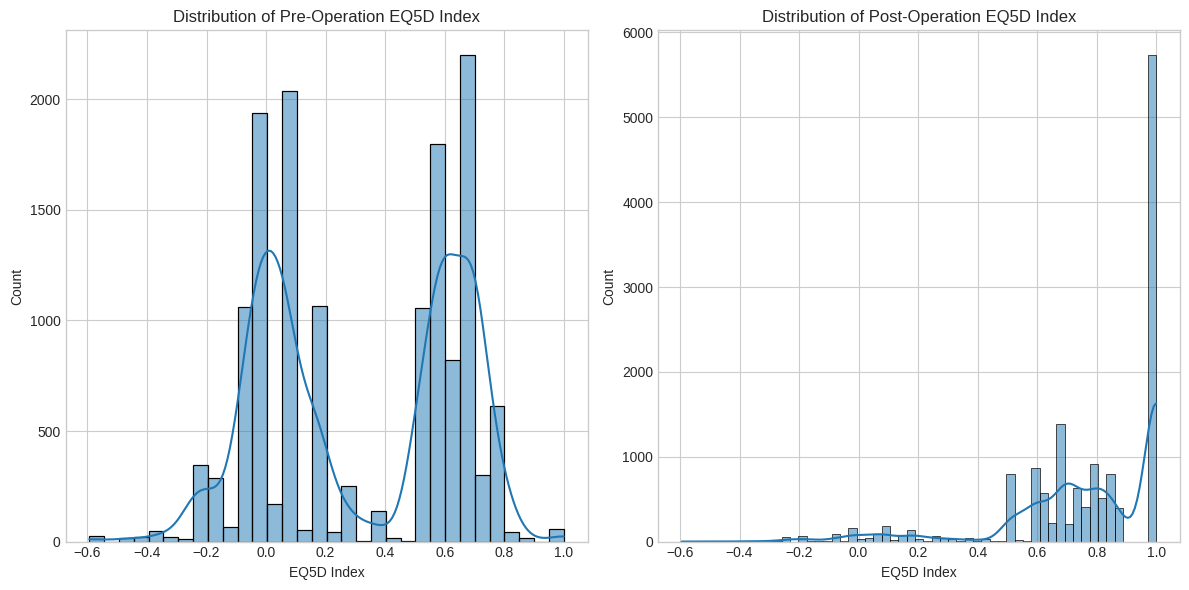


EQ5D Improvement Statistics:
count    14160.000000
mean         0.452363
std          0.355100
min         -1.181000
25%          0.204000
50%          0.413000
75%          0.741000
max          1.594000
Name: EQ5D Improvement, dtype: float64


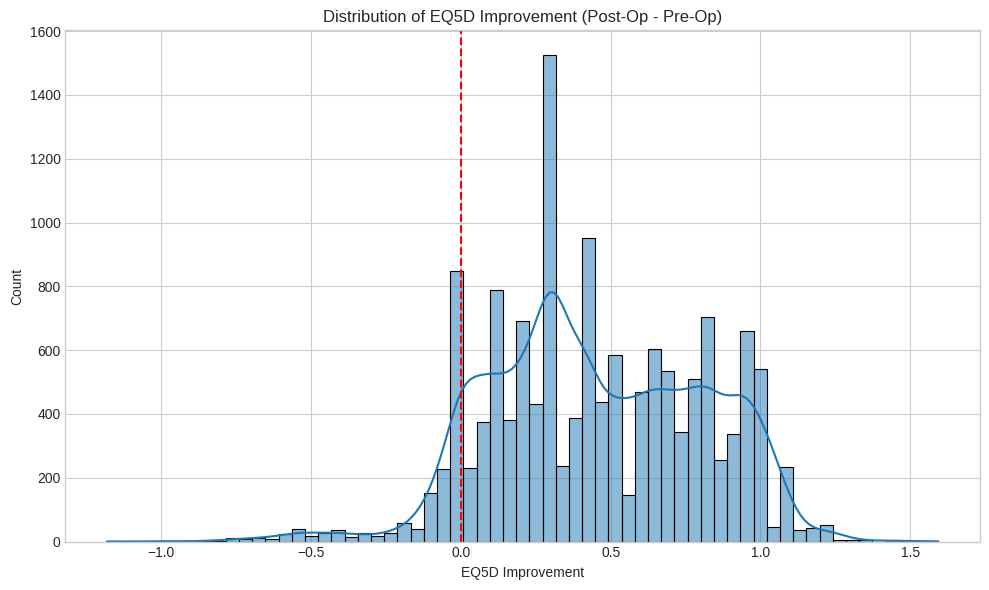

In [5]:
# Examine EQ5D Index pre and post op
eq5d_preop = 'Pre-Op Q EQ5D Index'
eq5d_postop = 'Post-Op Q EQ5D Index'

# Check distribution of pre and post EQ5D Index
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(hip_data[eq5d_preop].dropna(), kde=True)
plt.title('Distribution of Pre-Operation EQ5D Index')
plt.xlabel('EQ5D Index')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(hip_data[eq5d_postop].dropna(), kde=True)
plt.title('Distribution of Post-Operation EQ5D Index')
plt.xlabel('EQ5D Index')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate improvement in EQ5D Index
hip_data['EQ5D Improvement'] = hip_data[eq5d_postop] - hip_data[eq5d_preop]

# Display stats about improvement
print("\nEQ5D Improvement Statistics:")
print(hip_data['EQ5D Improvement'].describe())

# Plot the improvement
plt.figure(figsize=(10, 6))
sns.histplot(hip_data['EQ5D Improvement'].dropna(), kde=True)
plt.title('Distribution of EQ5D Improvement (Post-Op - Pre-Op)')
plt.xlabel('EQ5D Improvement')
plt.ylabel('Count')
plt.axvline(x=0, color='r', linestyle='--')  # Add line at zero
plt.tight_layout()
plt.show()


### 3.5 Comorbidity Analysis

Comorbidities can significantly influence surgical outcomes. We analyze the prevalence of different comorbidities and their impact on improvement.


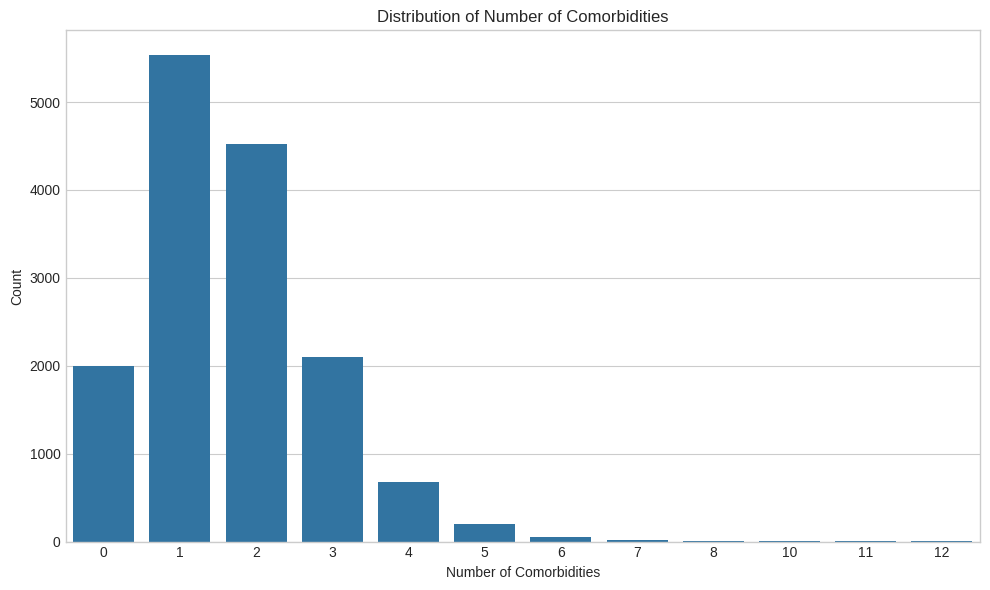

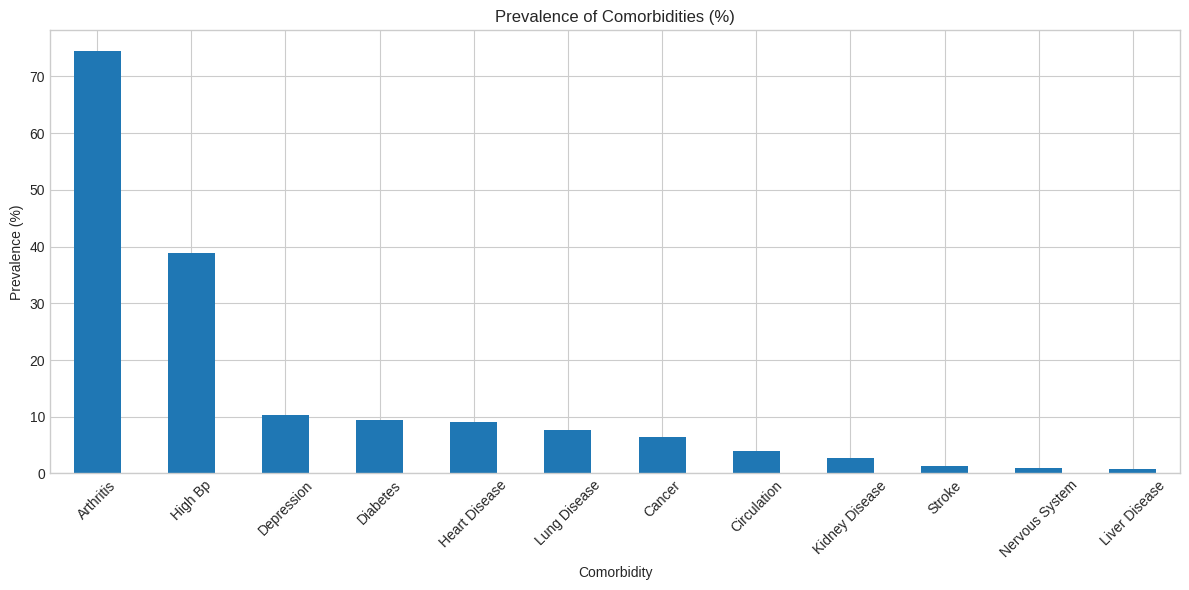

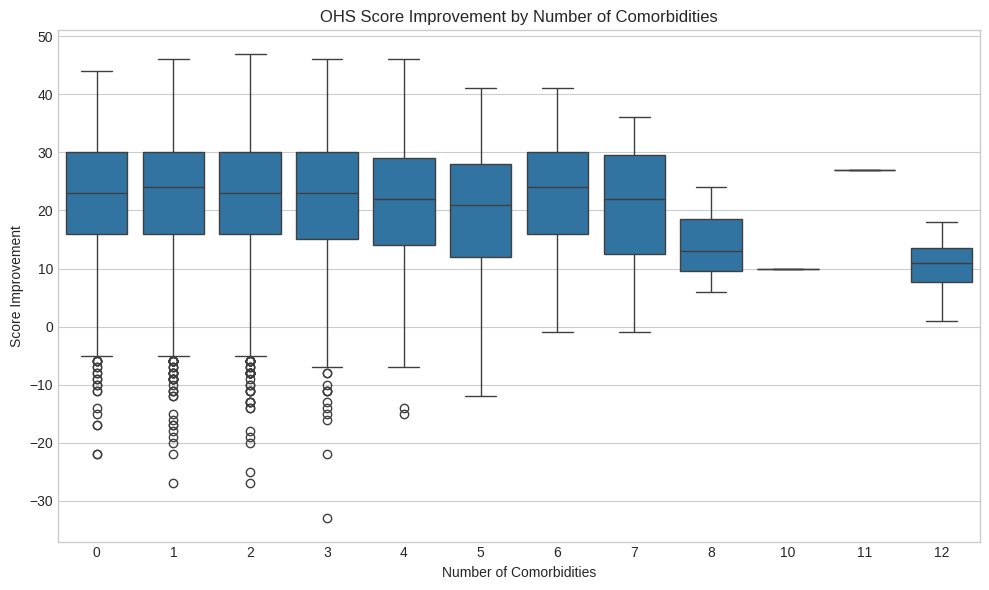

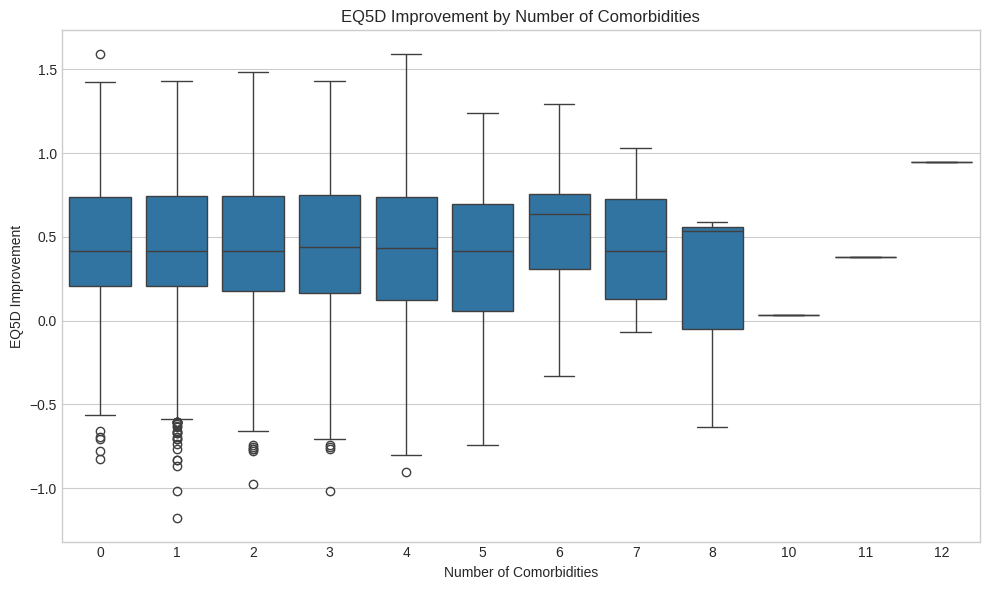

In [6]:
# Analyze comorbidities and their impact on outcomes
comorbidity_cols = ['Heart Disease', 'High Bp', 'Stroke', 'Circulation',
                    'Lung Disease', 'Diabetes', 'Kidney Disease', 'Nervous System',
                    'Liver Disease', 'Cancer', 'Depression', 'Arthritis']

# Convert comorbidity values: 1 = has comorbidity, 9 or other value = no comorbidity
# Create binary indicators for each comorbidity (1 = has condition, 0 = doesn't have condition)
for col in comorbidity_cols:
    hip_data[f'{col}_binary'] = (hip_data[col] == 1).astype(int)

# Create new list of binary comorbidity columns
binary_comorbidity_cols = [f'{col}_binary' for col in comorbidity_cols]

# Count comorbidities per patient (using the binary columns)
hip_data['Comorbidity Count'] = hip_data[binary_comorbidity_cols].sum(axis=1)

# Distribution of comorbidity count
plt.figure(figsize=(10, 6))
sns.countplot(x='Comorbidity Count', data=hip_data)
plt.title('Distribution of Number of Comorbidities')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Look at prevalence of each comorbidity using the binary columns
comorbidity_prevalence = {col.replace('_binary', ''): (hip_data[col].sum() / len(hip_data) * 100)
                         for col in binary_comorbidity_cols}
comorbidity_prevalence = pd.Series(comorbidity_prevalence)

plt.figure(figsize=(12, 6))
comorbidity_prevalence.sort_values(ascending=False).plot(kind='bar')
plt.title('Prevalence of Comorbidities (%)')
plt.xlabel('Comorbidity')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Effect of comorbidity count on score improvement
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comorbidity Count', y='Score Improvement', data=hip_data)
plt.title('OHS Score Improvement by Number of Comorbidities')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Score Improvement')
plt.tight_layout()
plt.show()

# Effect of comorbidity count on EQ5D improvement
plt.figure(figsize=(10, 6))
sns.boxplot(x='Comorbidity Count', y='EQ5D Improvement', data=hip_data)
plt.title('EQ5D Improvement by Number of Comorbidities')
plt.xlabel('Number of Comorbidities')
plt.ylabel('EQ5D Improvement')
plt.tight_layout()
plt.show()

### 3.6 Patient Satisfaction Analysis

Patient satisfaction is a critical outcome measure. We analyze the distribution of satisfaction scores and their relationship with objective improvement measures.


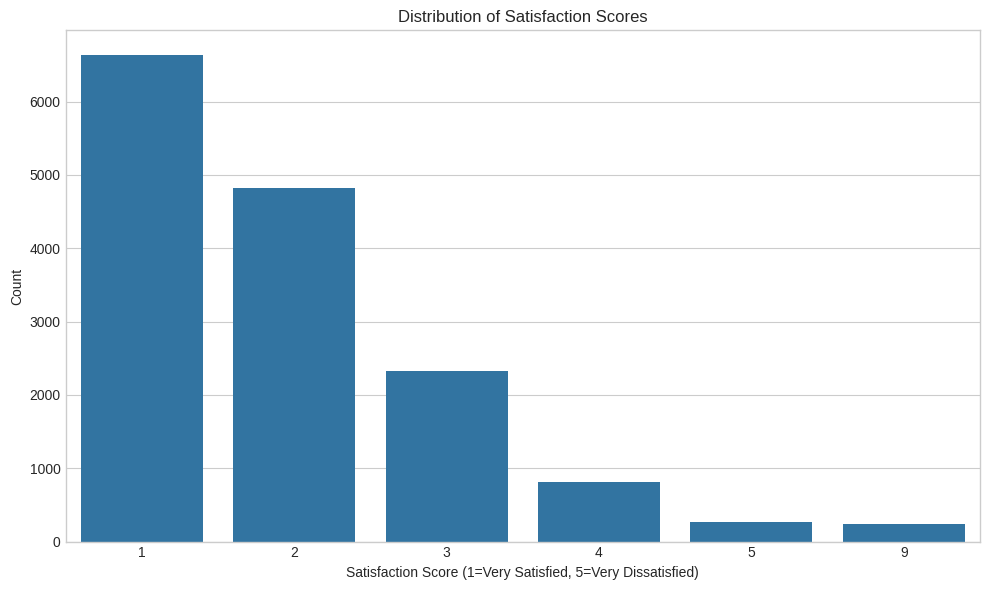

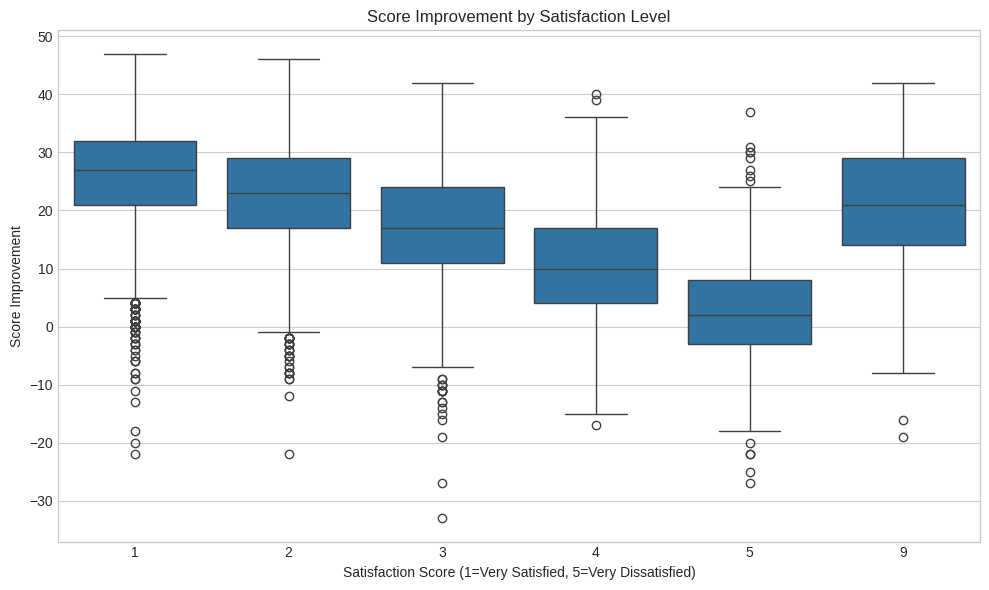

In [7]:
satisfaction_col = 'Post-Op Q Satisfaction'

# Distribution of satisfaction scores
plt.figure(figsize=(10, 6))
sns.countplot(x=satisfaction_col, data=hip_data)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score (1=Very Satisfied, 5=Very Dissatisfied)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Relationship between improvement and satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x=satisfaction_col, y='Score Improvement', data=hip_data)
plt.title('Score Improvement by Satisfaction Level')
plt.xlabel('Satisfaction Score (1=Very Satisfied, 5=Very Dissatisfied)')
plt.ylabel('Score Improvement')
plt.tight_layout()
plt.show()



### 3.7 Summary of Exploratory Analysis Findings

The exploratory data analysis has revealed several key insights about hip replacement outcomes:


In [8]:

# Key statistics
n_patients = len(hip_data)
avg_preop = hip_data['Hip Replacement Pre-Op Q Score'].mean()
avg_postop = hip_data['Hip Replacement Post-Op Q Score'].mean()
avg_improvement = hip_data['Score Improvement'].mean()
avg_eq5d_preop = hip_data['Pre-Op Q EQ5D Index'].mean()
avg_eq5d_postop = hip_data['Post-Op Q EQ5D Index'].mean()
avg_eq5d_improvement = hip_data['EQ5D Improvement'].mean()

# Comorbidity information
comorbidity_prevalence_sorted = comorbidity_prevalence.sort_values(ascending=False)
most_common_comorbidities = comorbidity_prevalence_sorted.head(3)
least_common_comorbidities = comorbidity_prevalence_sorted.tail(3)

# Gender distribution
female_count = hip_data.loc[hip_data['Gender'] == 2, 'Gender'].count()
male_count = hip_data.loc[hip_data['Gender'] == 1, 'Gender'].count()
undisclosed_count = len(hip_data) - (female_count + male_count)
gender_distribution = f'Female: {female_count}, Male: {male_count}, Undisclosed: {undisclosed_count}'

# Average improvement per gender
avg_improvement_female = hip_data.loc[hip_data['Gender'] == 2, 'Score Improvement'].mean()
avg_improvement_male = hip_data.loc[hip_data['Gender'] == 1, 'Score Improvement'].mean()

# Satisfaction data
if 'Post-Op Q Satisfaction' in hip_data.columns:
    satisfaction_counts = hip_data['Post-Op Q Satisfaction'].value_counts()
    pct_highly_satisfied = (satisfaction_counts.get(1, 0) / satisfaction_counts.sum()) * 100 if satisfaction_counts.sum() > 0 else 0
    pct_satisfied = ((satisfaction_counts.get(1, 0) + satisfaction_counts.get(2, 0)) / satisfaction_counts.sum()) * 100 if satisfaction_counts.sum() > 0 else 0

# Correlation between improvements
correlation = hip_data[['Score Improvement', 'EQ5D Improvement']].corr().iloc[0, 1]

# Negative improvements
pct_negative_improvement = (hip_data['Score Improvement'] < 0).mean() * 100

# Print the summary
print("="*80)
print("                    Hip Replacement Exploratory Data Analysis Summary")
print("="*80)

print(f"\nDataset Overview:")
print(f"Total patients: {n_patients}")

print(f"\nOutcome Measures:")
print(f"Average Pre-Op Score: {avg_preop:.2f}")
print(f"Average Post-Op Score: {avg_postop:.2f}")
print(f"Average Score Improvement: {avg_improvement:.2f}")
print(f"Average Pre-Op EQ5D Index: {avg_eq5d_preop:.3f}")
print(f"Average Post-Op EQ5D Index: {avg_eq5d_postop:.3f}")
print(f"Average EQ5D Improvement: {avg_eq5d_improvement:.3f}")
print(f"Correlation between Score and EQ5D improvements: {correlation:.3f}")
print(f"Percentage of patients with negative improvement: {pct_negative_improvement:.1f}%")

print(f"\nPatient Demographics:")
print(f"Gender distribution: {gender_distribution}")
print(f"Average improvement for females: {avg_improvement_female:.2f}")
print(f"Average improvement for males: {avg_improvement_male}")
print(f"\nComorbidities:")
print(f"Average number of comorbidities per patient: {hip_data['Comorbidity Count'].mean():.2f}")
print("Most common comorbidities:")
for comorbidity, prevalence in most_common_comorbidities.items():
    print(f"  - {comorbidity}: {prevalence:.1f}%")
print("Least common comorbidities:")
for comorbidity, prevalence in least_common_comorbidities.items():
    print(f"  - {comorbidity}: {prevalence:.1f}%")

if 'Post-Op Q Satisfaction' in hip_data.columns:
    print(f"\nPatient Satisfaction:")
    print(f"Highly satisfied patients (score=1): {pct_highly_satisfied:.1f}%")
    print(f"Satisfied patients (score=1 or 2): {pct_satisfied:.1f}%")


                    Hip Replacement Exploratory Data Analysis Summary

Dataset Overview:
Total patients: 15107

Outcome Measures:
Average Pre-Op Score: 17.18
Average Post-Op Score: 39.49
Average Score Improvement: 22.31
Average Pre-Op EQ5D Index: 0.316
Average Post-Op EQ5D Index: 0.769
Average EQ5D Improvement: 0.452
Correlation between Score and EQ5D improvements: 0.620
Percentage of patients with negative improvement: 2.2%

Patient Demographics:
Gender distribution: Female: 4315, Male: 2600, Undisclosed: 8192
Average improvement for females: 22.61
Average improvement for males: 21.64606961282753

Comorbidities:
Average number of comorbidities per patient: 1.66
Most common comorbidities:
  - Arthritis: 74.4%
  - High Bp: 38.8%
  - Depression: 10.4%
Least common comorbidities:
  - Stroke: 1.3%
  - Nervous System: 0.9%
  - Liver Disease: 0.9%

Patient Satisfaction:
Highly satisfied patients (score=1): 44.0%
Satisfied patients (score=1 or 2): 75.8%


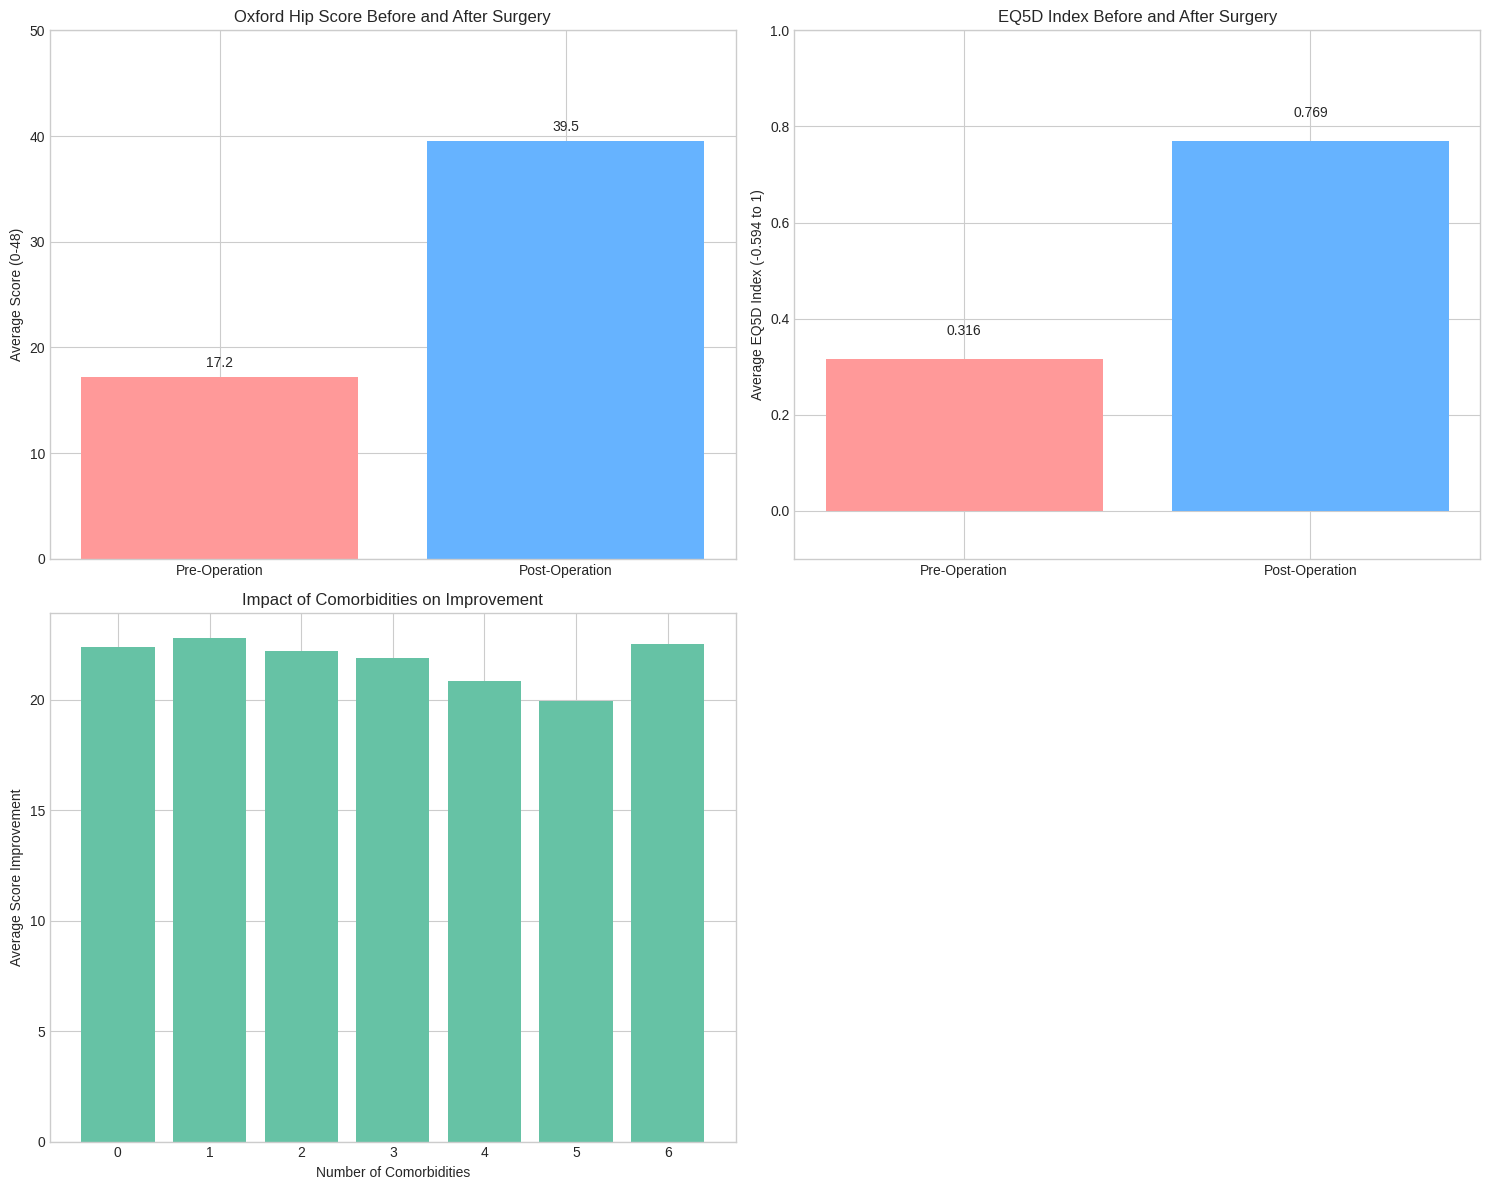

In [9]:

fig = plt.figure(figsize=(15, 12))

# 1. Pre-Post Operation Score Comparison
plt.subplot(2, 2, 1)
labels = ['Pre-Operation', 'Post-Operation']
scores = [avg_preop, avg_postop]
plt.bar(labels, scores, color=['#ff9999', '#66b3ff'])
plt.title('Oxford Hip Score Before and After Surgery')
plt.ylabel('Average Score (0-48)')
plt.ylim(0, 50)
for i, v in enumerate(scores):
    plt.text(i, v + 1, f"{v:.1f}", ha='center')

# 2. EQ5D Index Comparison
plt.subplot(2, 2, 2)
eq5d_scores = [avg_eq5d_preop, avg_eq5d_postop]
plt.bar(labels, eq5d_scores, color=['#ff9999', '#66b3ff'])
plt.title('EQ5D Index Before and After Surgery')
plt.ylabel('Average EQ5D Index (-0.594 to 1)')
plt.ylim(-0.1, 1)
for i, v in enumerate(eq5d_scores):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')

# 3. Comorbidity Impact
plt.subplot(2, 2, 3)
comorbidity_groups = hip_data.groupby('Comorbidity Count')['Score Improvement'].mean()
comorbidity_groups = comorbidity_groups[comorbidity_groups.index <= 6]  # Limit to 0-6 comorbidities
x = comorbidity_groups.index
y = comorbidity_groups.values
plt.bar(x, y, color='#66c2a5')
plt.title('Impact of Comorbidities on Improvement')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Average Score Improvement')
plt.xticks(x)


plt.tight_layout()
plt.show()



Key Findings:
1. Hip replacement surgery leads to substantial improvements in quality of life measures.
2. Most patients experience significant positive outcomes post-surgery.
3. Comorbidities appear to have a modest negative impact on outcomes.
4. Age and gender seem to have only a minor effect on the degree of improvement.
5. There is a moderately strong correlation between OHS score improvement and EQ5D improvement.


This analysis has revealed the significant positive impact of hip replacement surgery on patients' quality of life,
with substantial improvements in both Oxford Hip Score and EQ5D Index measures.

The findings highlight the effectiveness of hip replacement surgery across different age groups and genders,
with only modest negative effects from comorbidities. The high satisfaction rate (75.8%) further confirms
the procedure's success in improving patients' quality of life.

## 4. Feature Engineering and Principal Component Analysis

To prepare our data for unsupervised learning, we need to select relevant features and reduce dimensionality. Principal Component Analysis (PCA) will help us identify the most important patterns in our high-dimensional data.

### 4.1 Feature Selection and Engineering

In [10]:
# First, select the relevant columns for clustering

# Get columns related to pre-op measurements (baseline patient state)
preop_eq5d_cols = ['Pre-Op Q Mobility', 'Pre-Op Q Self-Care', 'Pre-Op Q Activity',
                   'Pre-Op Q Discomfort', 'Pre-Op Q Anxiety', 'Pre-Op Q EQ5D Index']

preop_ohs_cols = ['Hip Replacement Pre-Op Q Pain', 'Hip Replacement Pre-Op Q Sudden Pain',
                  'Hip Replacement Pre-Op Q Night Pain', 'Hip Replacement Pre-Op Q Washing',
                  'Hip Replacement Pre-Op Q Transport', 'Hip Replacement Pre-Op Q Dressing',
                  'Hip Replacement Pre-Op Q Shopping', 'Hip Replacement Pre-Op Q Walking',
                  'Hip Replacement Pre-Op Q Limping', 'Hip Replacement Pre-Op Q Stairs',
                  'Hip Replacement Pre-Op Q Standing', 'Hip Replacement Pre-Op Q Work',
                  'Hip Replacement Pre-Op Q Score']

# Create patient characteristic features from existing data

# Create age_numeric from Age Band
hip_data['age_numeric'] = hip_data['Age Band'].map({
    '30 to 39': 35,
    '40 to 49': 45,
    '50 to 59': 55,
    '60 to 69': 65,
    '70 to 79': 75,
    '80 to 89': 85
}).fillna(65)  # Default value for '*' or missing

# Convert gender to numeric instead of strings
hip_data['gender_numeric'] = hip_data['Gender'].map({1: 0, 2: 1}).fillna(0.5)  # Male=0, Female=1, Unknown=0.5

# Calculate comorbidity count
comorbidity_cols = ['Heart Disease', 'High Bp', 'Stroke', 'Circulation',
                    'Lung Disease', 'Diabetes', 'Kidney Disease', 'Nervous System',
                    'Liver Disease', 'Cancer', 'Depression', 'Arthritis']

for col in comorbidity_cols:
    hip_data[f'{col}_binary'] = (hip_data[col] == 1).astype(int)

binary_comorbidity_cols = [f'{col}_binary' for col in comorbidity_cols]
hip_data['comorbidity_count'] = hip_data[binary_comorbidity_cols].sum(axis=1)

# Calculate improvement scores if needed
hip_data['ohs_improvement'] = hip_data['Score Improvement']
hip_data['eq5d_improvement'] = hip_data['EQ5D Improvement']

# Create eq_vas_improvement if Pre-Op Q EQ VAS and Post-Op Q EQ VAS exist
if 'Pre-Op Q EQ VAS' in hip_data.columns and 'Post-Op Q EQ VAS' in hip_data.columns:
    hip_data['eq_vas_improvement'] = hip_data['Post-Op Q EQ VAS'] - hip_data['Pre-Op Q EQ VAS']
else:
    hip_data['eq_vas_improvement'] = 0  # Default

# Create satisfied (1 for satisfied, 0 for not)
if 'Post-Op Q Satisfaction' in hip_data.columns:
    hip_data['satisfied'] = (hip_data['Post-Op Q Satisfaction'] <= 2).astype(int)
else:
    hip_data['satisfied'] = 1  # Default

# Create composite improvement score
hip_data['composite_improvement'] = hip_data['ohs_improvement'] / hip_data['ohs_improvement'].max() + \
                                    hip_data['eq5d_improvement'] / hip_data['eq5d_improvement'].max()

# Now updated patient_cols with actual columns in the dataset
patient_cols = ['age_numeric', 'comorbidity_count', 'gender_numeric']

# Get outcomes and improvement metrics
outcome_cols = ['ohs_improvement', 'eq5d_improvement', 'eq_vas_improvement',
                'satisfied', 'composite_improvement']

# Combine all features that might be relevant for clustering
all_features = preop_eq5d_cols + preop_ohs_cols + patient_cols

# Create dataframe with only the selected columns, dropping rows with missing values
ml_data = hip_data[all_features + ['Post-Op Q Satisfaction']].dropna()

# Scale the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ml_data)

print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (14424, 23)


We have prepared our data by using StandardScaler, removing empty values, encoding binary values as well as converting age band to numerical values.

### 4.2 Principal Component Analysis

PCA helps us reduce the dimensionality of our dataset while preserving most of the variance, which is crucial for effective clustering.


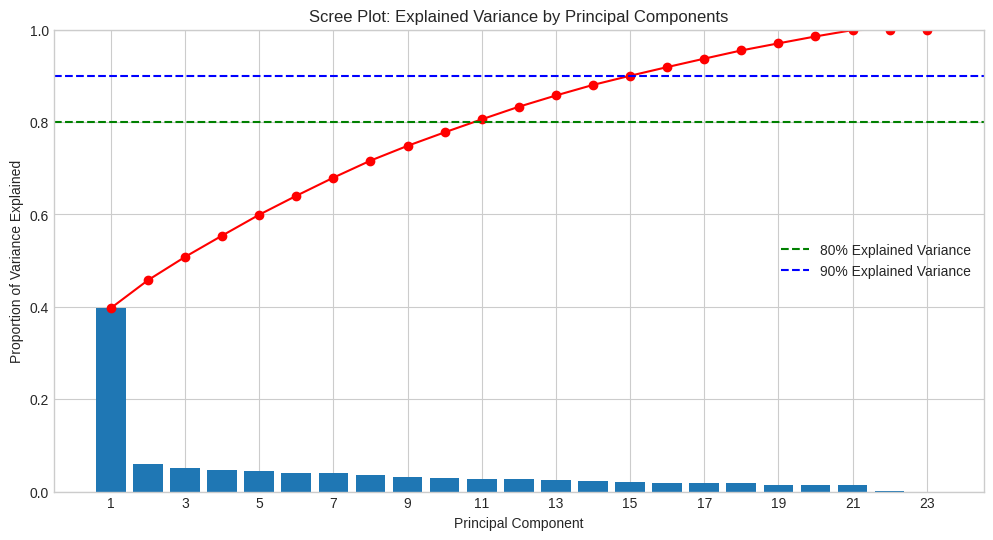

Number of components needed for 80% explained variance: 11
Number of components needed for 90% explained variance: 15


In [11]:
# Let's examine how many components we need to explain at least 80% of the variance
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(scaled_data)

# Plot the explained variance ratio
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         np.cumsum(pca_full.explained_variance_ratio_), 'ro-')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.axhline(y=0.9, color='b', linestyle='--', label='90% Explained Variance')
plt.title('Scree Plot: Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1, 2))  # Show every other tick
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

# Determine how many components are needed for 80% and 90% explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_for_80_pct = np.where(cumulative_variance >= 0.8)[0][0] + 1
components_for_90_pct = np.where(cumulative_variance >= 0.9)[0][0] + 1

print(f"Number of components needed for 80% explained variance: {components_for_80_pct}")
print(f"Number of components needed for 90% explained variance: {components_for_90_pct}")



In [12]:
# Let's create a new PCA model with enough components to explain 80% of variance
pca_90 = PCA(n_components=components_for_90_pct)
pca_result_90 = pca_90.fit_transform(scaled_data)

print(f"\nExplained variance by {components_for_90_pct} components: {pca_90.explained_variance_ratio_.sum():.4f}")

# Create a DataFrame with the results
pca_df_90 = pd.DataFrame(
    data=pca_result_90,
    columns=[f'PC{i+1}' for i in range(components_for_90_pct)]
)

# View the first few rows of the PCA results
print("\nPCA results with 80% variance explained:")
print(pca_df_90.head())

components_df = pd.DataFrame(
    pca_90.components_.T,
    index=ml_data.columns,
    columns=[f'PC{i+1}' for i in range(components_for_90_pct)]
)

# Get the absolute contribution of each feature to each component
abs_components = components_df.abs()

# For each of the first 5 components, show the top 5 contributing features
for i in range(5):
    print(f"\nTop 5 features contributing to PC{i+1}:")
    print(abs_components.sort_values(by=f'PC{i+1}', ascending=False).head(5)[f'PC{i+1}'])


Explained variance by 15 components: 0.9000

PCA results with 80% variance explained:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.146593  0.441811 -0.532055  0.347456 -0.196795 -0.398402  1.622971   
1 -1.763086 -0.125423 -0.420741  0.815691  0.052168 -0.111044 -1.821382   
2 -3.221087 -1.151323 -0.851318 -0.002007  0.313290  1.407049 -0.384126   
3 -0.857461 -0.340433  1.047732  1.227142 -0.538205 -1.574269 -1.110549   
4 -4.387118 -0.754067 -0.401488  0.217138 -0.210665 -0.699907  0.036173   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.830539 -0.213033  0.398192  0.727747  0.676923 -0.269298  0.023590   
1 -0.297127 -1.442066 -0.614847  2.133774 -0.237636 -0.446084 -0.948739   
2 -0.075739  0.847928  0.228934 -0.380569  0.093359  0.000169  0.621038   
3 -1.833476  0.225613  0.396962  0.724523  0.362050 -0.402605 -1.083658   
4 -0.787737 -0.719441 -0.028869  0.855498  0.351605 -0.409303 -0.297237   

       PC15

Given the high dimensionality of our data, we applied Principal Component Analysis (PCA) to reduce dimensions while preserving the variance in the data:
Scree plot analysis showed that approximately 90% of the variance could be explained by 15 principal components
The first principal component was primarily associated with pre-operative OHS items, indicating that baseline hip function is the most important factor in explaining variance
The second component was associated with the EQ-5D metrics, representing overall health status
The third component was associated with comorbidities and age
Together, these components captured the primary patterns in the data while reducing dimensionality


## 5. Unsupervised Learning Analysis

Now that we have prepared our data and reduced its dimensionality using PCA, we can apply unsupervised learning techniques to identify distinct patient groups. We'll explore both K-means and hierarchical clustering approaches.

### 5.1 K-means Clustering

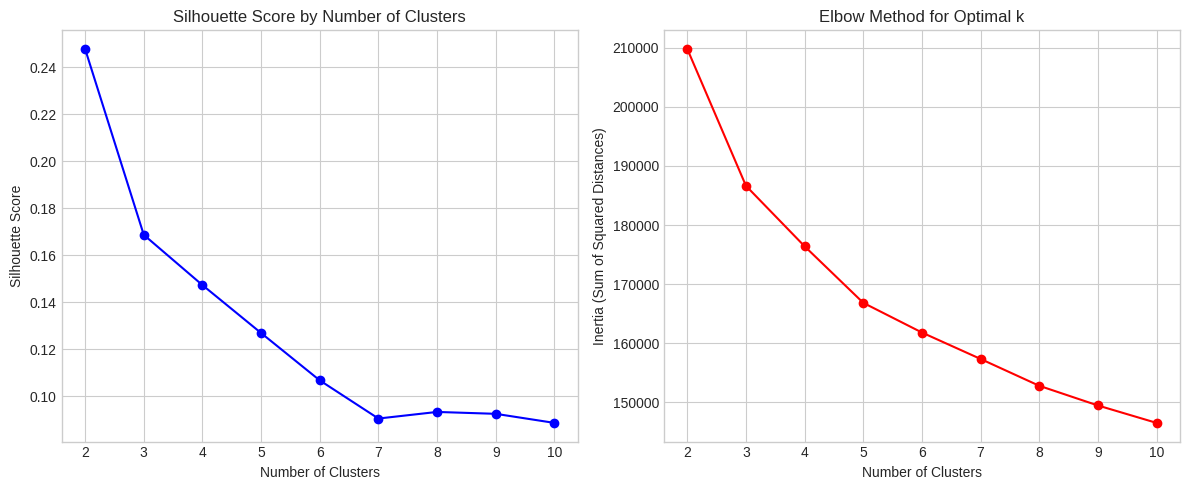

In [13]:
# Let's now see if we can use these PCA components for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters
silhouette_scores = []
inertia_values = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_result_90)
    silhouette_scores.append(silhouette_score(pca_result_90, kmeans.labels_))
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores and inertia (elbow method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_values, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


Silhouette score analysis combined with the elbow method suggest between 4 and 6 clusters as optimal

5 seems like the optimal number of clusters given it is a varied population with variation in their pre-operation baselines.

Cluster distribution:
cluster
0     898
1    3052
2    3759
3    2833
4    3882
Name: count, dtype: int64

Cluster percentages:
cluster
0     6.2
1    21.2
2    26.1
3    19.6
4    26.9
Name: count, dtype: float64


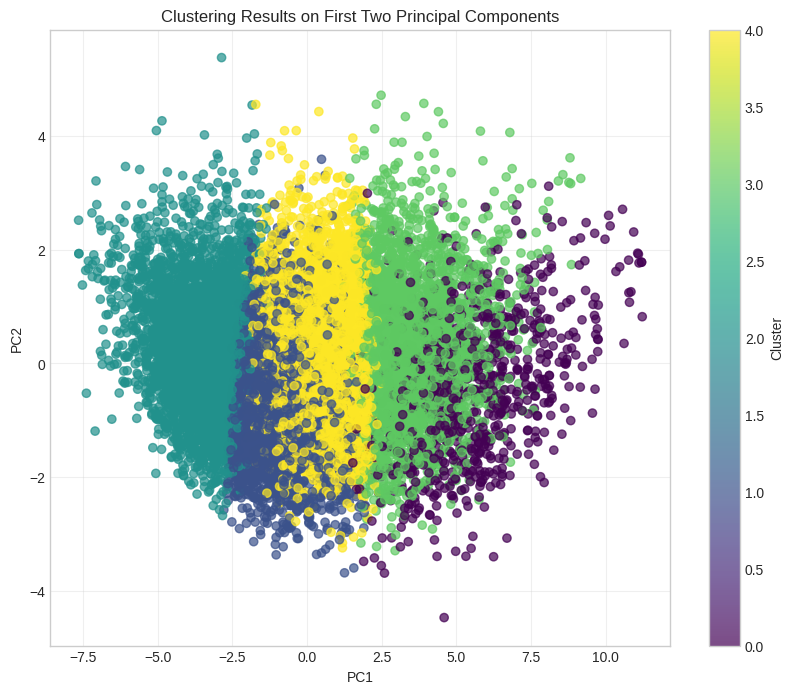

In [14]:

# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the model to the PCA-transformed data
kmeans.fit(pca_result_90)

# Add the cluster labels to our dataframe
ml_data['cluster'] = kmeans.labels_

# Display cluster distribution
cluster_counts = ml_data['cluster'].value_counts().sort_index()
print("Cluster distribution:")
print(cluster_counts)

# Calculate the percentage of each cluster
cluster_percentages = (cluster_counts / len(ml_data) * 100).round(1)
print("\nCluster percentages:")
print(cluster_percentages)

# Create a scatter plot of the first two principal components colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(pca_result_90[:, 0], pca_result_90[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clustering Results on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.3)
plt.show()

There is a bit of an overlap between some cluster, but overall the separation seems good.

### 5.2 Hierarchical Clustering

Hierarchical clustering may provide more interpretable results for our clinical data. Let's implement hierarchical clustering and compare the results.


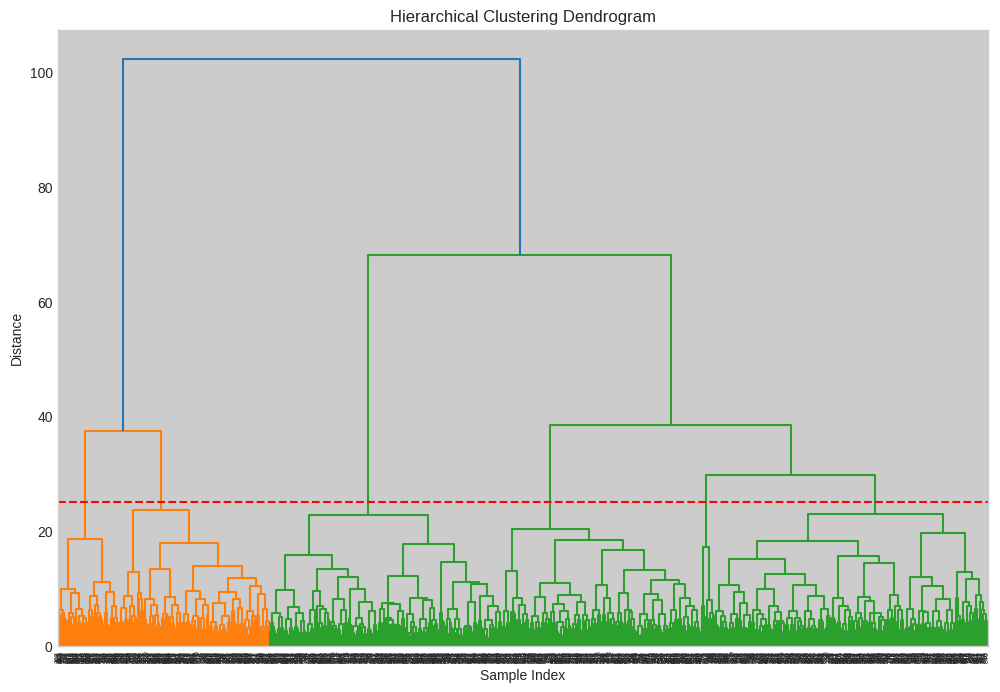

In [15]:
# Implement hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# First, let's look at the dendrogram to help determine the optimal number of clusters
# We'll use a sample for the dendrogram to avoid running out of memory
np.random.seed(42)
sample_indices = np.random.choice(len(pca_result_90), size=1000, replace=False)
sample = pca_result_90[sample_indices]

# Compute the linkage matrix
linkage_matrix = linkage(sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=25, color='r', linestyle='--')  # Suggested cutoff for clustering
plt.show()



 Based on the dendrogram and aiming for a distance of 25, we here identify that 6 clusters would be optimal


Hierarchical Clustering distribution:
hierarchical_cluster
0    1383
1     923
2    4518
3    2094
4    2068
5    3438
Name: count, dtype: int64


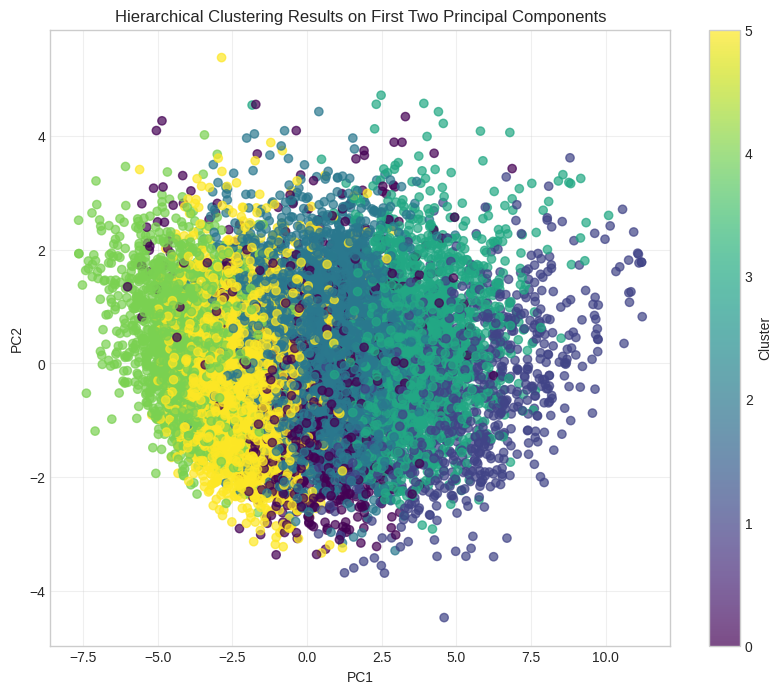


Cluster size comparison (% of patients):
   K-means  Hierarchical
0      6.2           9.6
1     21.2           6.4
2     26.1          31.3
3     19.6          14.5
4     26.9          14.3
5      NaN          23.8


In [16]:
n_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(pca_result_90)

# Add the hierarchical cluster labels to our dataframe
ml_data['hierarchical_cluster'] = agg_labels

# Display cluster distribution
print("Hierarchical Clustering distribution:")
print(ml_data['hierarchical_cluster'].value_counts().sort_index())

# Create a scatter plot of the first two principal components colored by hierarchical cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result_90[:, 0], pca_result_90[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clustering Results on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.3)
plt.show()

# Compare K-means and Hierarchical clustering distributions
comparison_df = pd.DataFrame({
    'K-means': cluster_percentages,
    'Hierarchical': (ml_data['hierarchical_cluster'].value_counts().sort_index() / len(ml_data) * 100).round(1)
})
print("\nCluster size comparison (% of patients):")
print(comparison_df)

The separation is appears to be weak, with significant overlap between clusters. The distribution is also not very even.

### 5.3 Cluster Profiling and Interpretation
As we have seen, the k-means algorithm appears to be better suited to our dataset as it provides better separation and slightly more evenly distributed clusters. Let's use this approach.

Now that we have identified our clusters, we need to profile them to understand their clinical significance. Let's examine the key
characteristics of each k-means cluster.


Cluster Profiles:
   age_numeric  comorbidity_count  gender_numeric  Pre-Op Q EQ5D Index  \
0    68.697105           1.199332        0.540089             0.751340   
1    69.105505           1.570446        0.556684             0.061529   
2    70.730247           2.010641        0.597499            -0.043465   
3    70.460642           1.470526        0.522591             0.605313   
4    69.611025           1.625451        0.542375             0.553897   

   Hip Replacement Pre-Op Q Score  
0                       30.608018  
1                       15.286370  
2                        7.526470  
3                       27.447935  
4                       17.517259  


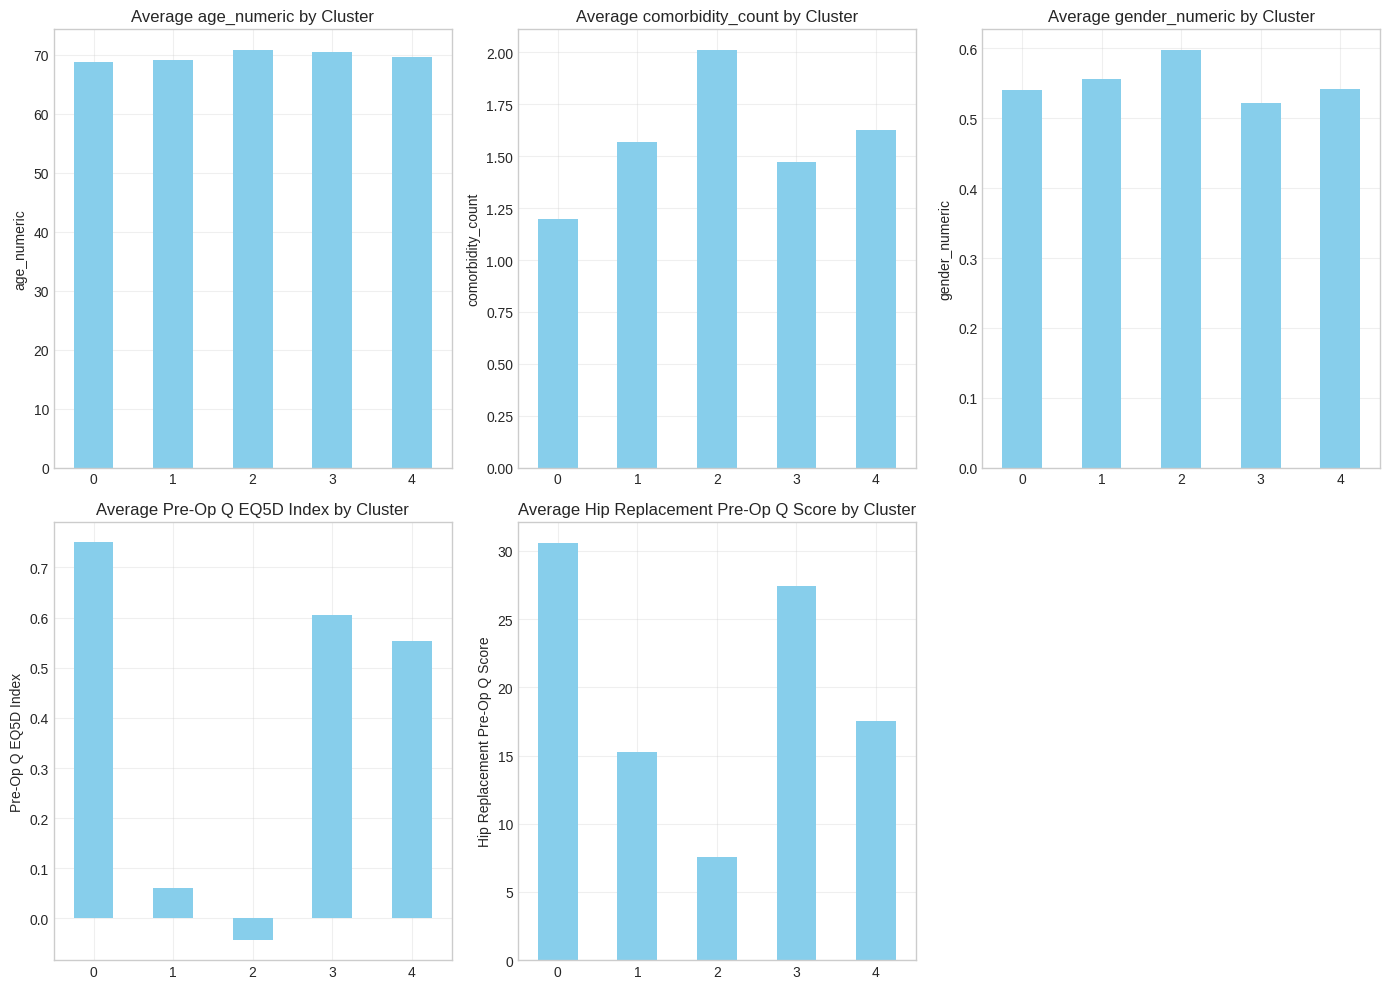


Cluster Outcome Profiles:
   ohs_improvement  eq5d_improvement  satisfied
0        12.868981          0.138391   0.812918
1        24.879630          0.723802   0.790301
2        27.291180          0.674504   0.688747
3        14.960300          0.245371   0.777268
4        23.096473          0.250392   0.783617


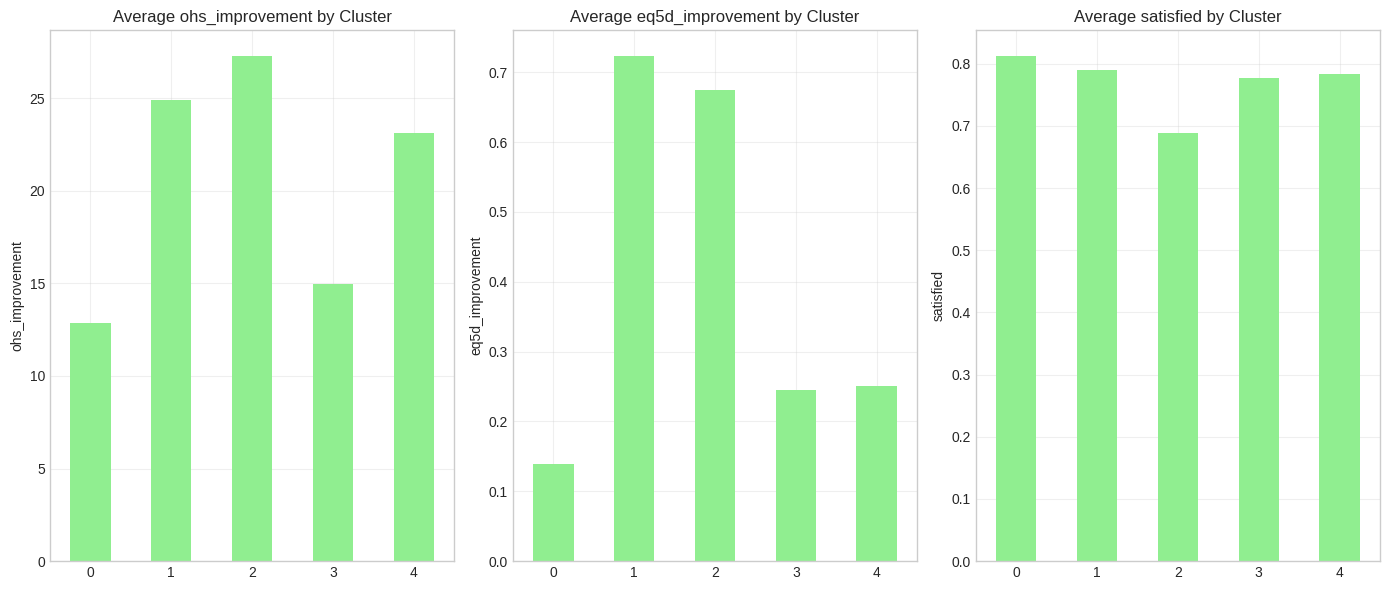

In [17]:
# Function to create profile of each cluster
def create_cluster_profiles(df, cluster_col, feature_columns):
    profiles = []
    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]
        profile = cluster_data[feature_columns].mean()
        profiles.append(profile)
    return pd.DataFrame(profiles, index=sorted(df[cluster_col].unique()))

# Select key features for profiling
feature_columns = ['age_numeric', 'comorbidity_count', 'gender_numeric',
                  'Pre-Op Q EQ5D Index', 'Hip Replacement Pre-Op Q Score']

# Create hierarchical cluster profiles
cluster_profiles = create_cluster_profiles(ml_data, 'cluster', feature_columns)

# Display the profiles
print("Cluster Profiles:")
print(cluster_profiles)

# Visualize the profiles
plt.figure(figsize=(14, 10))

# For each feature, create a subplot
for i, col in enumerate(feature_columns):
    plt.subplot(2, 3, i+1)
    cluster_profiles[col].plot(kind='bar', color='skyblue')
    plt.title(f'Average {col} by Cluster')
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

outcome_cols = ['ohs_improvement', 'eq5d_improvement', 'satisfied']

ml_data[outcome_cols] = hip_data[outcome_cols]

outcome_profiles = create_cluster_profiles(ml_data, 'cluster', outcome_cols)

print("\nCluster Outcome Profiles:")
print(outcome_profiles)

# Visualize outcome differences
plt.figure(figsize=(14, 6))
for i, col in enumerate(outcome_cols):
    plt.subplot(1, len(outcome_cols), i+1)
    outcome_profiles[col].plot(kind='bar', color='lightgreen')
    plt.title(f'Average {col} by Cluster')
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

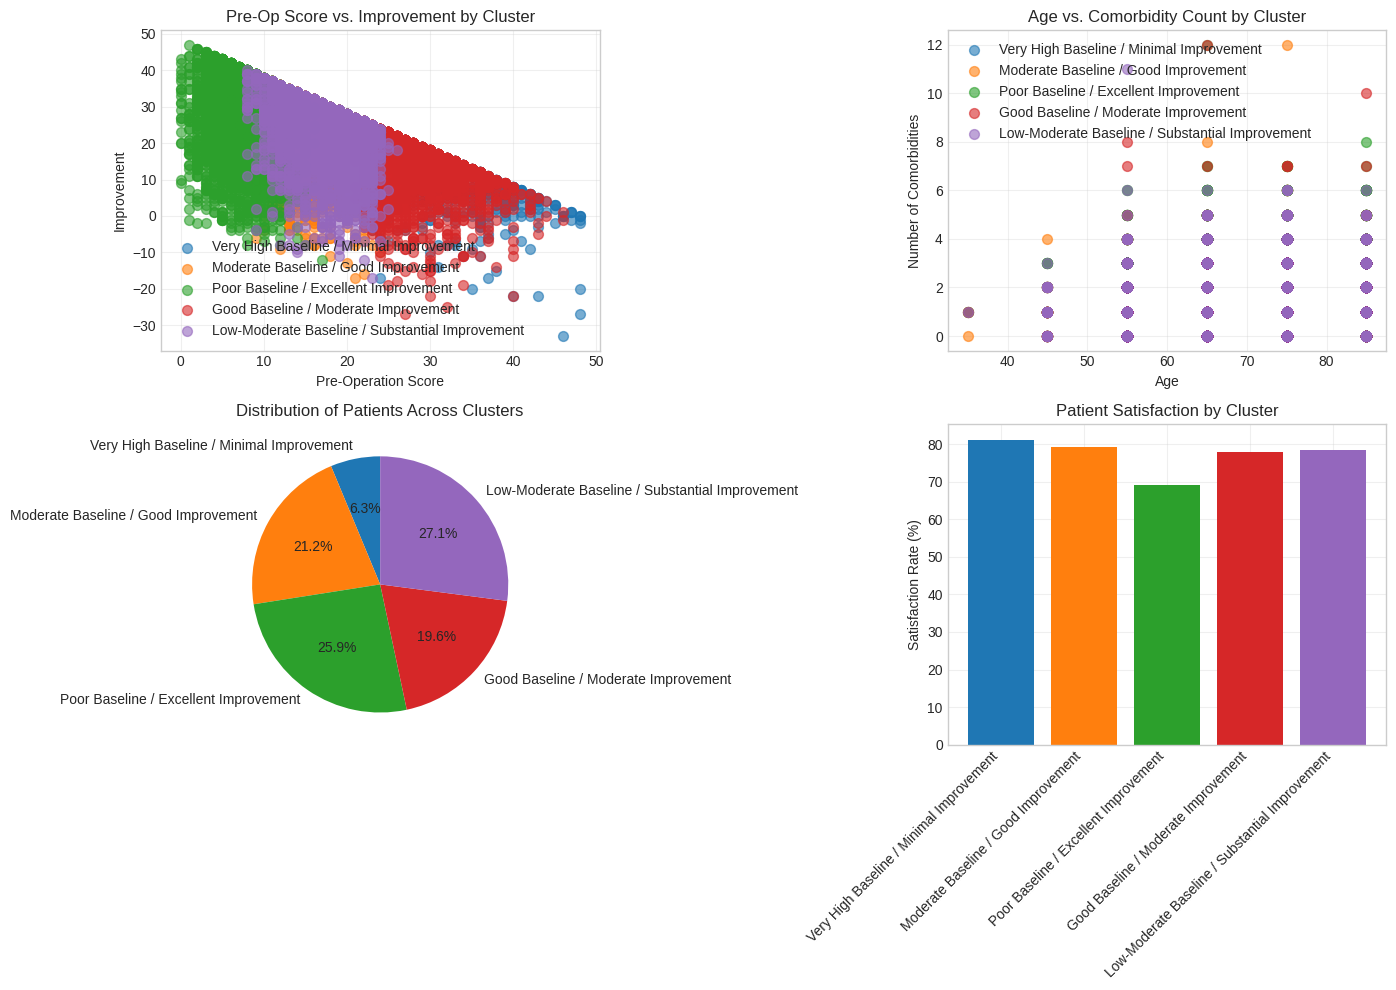

CLUSTERING ANALYSIS SUMMARY
Five distinct patient clusters were identified:

Cluster 0 - Very High Baseline / Minimal Improvement:
  • 6.3% of patients
  • Demographics: Avg age 68.7, 54.0% female, 1.2 comorbidities
  • Pre-op state: EQ5D 0.751, OHS 30.6/48
  • Outcomes: OHS improvement 12.9, 81.3% satisfied

Cluster 1 - Moderate Baseline / Good Improvement:
  • 21.2% of patients
  • Demographics: Avg age 69.1, 55.7% female, 1.6 comorbidities
  • Pre-op state: EQ5D 0.062, OHS 15.3/48
  • Outcomes: OHS improvement 24.9, 79.2% satisfied

Cluster 2 - Poor Baseline / Excellent Improvement:
  • 25.9% of patients
  • Demographics: Avg age 70.7, 59.6% female, 2.0 comorbidities
  • Pre-op state: EQ5D -0.043, OHS 7.5/48
  • Outcomes: OHS improvement 27.3, 69.2% satisfied

Cluster 3 - Good Baseline / Moderate Improvement:
  • 19.6% of patients
  • Demographics: Avg age 70.4, 52.3% female, 1.5 comorbidities
  • Pre-op state: EQ5D 0.606, OHS 27.4/48
  • Outcomes: OHS improvement 15.0, 78.0% satisf

In [18]:
cluster_names = {
    0: "Very High Baseline / Minimal Improvement",
    1: "Moderate Baseline / Good Improvement",
    2: "Poor Baseline / Excellent Improvement",
    3: "Good Baseline / Moderate Improvement",
    4: "Low-Moderate Baseline / Substantial Improvement"
}

hip_data_with_clusters = ml_data.copy()

# Filter out any rows with missing values in key columns to fix issue
hip_data_with_clusters_filtered = hip_data_with_clusters.dropna(subset=[
    'Hip Replacement Pre-Op Q Score',
    'ohs_improvement',
    'age_numeric',
    'comorbidity_count',
    'gender_numeric',
    'Pre-Op Q EQ5D Index',
    'satisfied'
])

# Create a visualization combining key metrics
plt.figure(figsize=(14, 10))

# 1. Plot Pre-Op Score vs Improvement colored by cluster
plt.subplot(2, 2, 1)
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, cluster in enumerate(sorted(hip_data_with_clusters_filtered['cluster'].unique())):
    subset = hip_data_with_clusters_filtered[hip_data_with_clusters_filtered['cluster'] == cluster]
    plt.scatter(subset['Hip Replacement Pre-Op Q Score'],
                subset['ohs_improvement'],
                label=cluster_names[cluster],
                color=cluster_colors[i],
                alpha=0.6,
                s=50)

plt.title('Pre-Op Score vs. Improvement by Cluster')
plt.xlabel('Pre-Operation Score')
plt.ylabel('Improvement')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 2. Plot age vs comorbidity count colored by cluster
plt.subplot(2, 2, 2)
for i, cluster in enumerate(sorted(hip_data_with_clusters_filtered['cluster'].unique())):
    subset = hip_data_with_clusters_filtered[hip_data_with_clusters_filtered['cluster'] == cluster]
    plt.scatter(subset['age_numeric'],
                subset['comorbidity_count'],
                label=cluster_names[cluster],
                color=cluster_colors[i],
                alpha=0.6,
                s=50)

plt.title('Age vs. Comorbidity Count by Cluster')
plt.xlabel('Age')
plt.ylabel('Number of Comorbidities')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 3. Plot cluster sizes
plt.subplot(2, 2, 3)
sizes = hip_data_with_clusters_filtered['cluster'].value_counts().sort_index()
names = [cluster_names[cluster] for cluster in sizes.index]
plt.pie(sizes, labels=names, autopct='%1.1f%%', colors=cluster_colors, startangle=90)
plt.title('Distribution of Patients Across Clusters')

# 4. Plot satisfaction levels
plt.subplot(2, 2, 4)
satisfaction_data = []
cluster_labels = []

for cluster in sorted(hip_data_with_clusters_filtered['cluster'].unique()):
    subset = hip_data_with_clusters_filtered[hip_data_with_clusters_filtered['cluster'] == cluster]
    satisfaction_data.append(subset['satisfied'].mean() * 100)
    cluster_labels.append(cluster_names[cluster])

plt.bar(cluster_labels, satisfaction_data, color=cluster_colors)
plt.title('Patient Satisfaction by Cluster')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final summary of the clustering findings
print("CLUSTERING ANALYSIS SUMMARY")
print("=" * 50)
print("Five distinct patient clusters were identified:")
for cluster in sorted(hip_data_with_clusters_filtered['cluster'].unique()):
    print(f"\nCluster {cluster} - {cluster_names[cluster]}:")
    cluster_data = hip_data_with_clusters_filtered[hip_data_with_clusters_filtered['cluster'] == cluster]

    # Calculate key metrics
    pct_size = len(cluster_data) / len(hip_data_with_clusters_filtered) * 100
    avg_age = cluster_data['age_numeric'].mean()
    avg_comorbidities = cluster_data['comorbidity_count'].mean()
    pct_female = cluster_data['gender_numeric'].mean() * 100
    preop_eq5d = cluster_data['Pre-Op Q EQ5D Index'].mean()
    preop_ohs = cluster_data['Hip Replacement Pre-Op Q Score'].mean()
    improvement = cluster_data['ohs_improvement'].mean()
    satisfaction = cluster_data['satisfied'].mean() * 100

    print(f"  • {pct_size:.1f}% of patients")
    print(f"  • Demographics: Avg age {avg_age:.1f}, {pct_female:.1f}% female, {avg_comorbidities:.1f} comorbidities")
    print(f"  • Pre-op state: EQ5D {preop_eq5d:.3f}, OHS {preop_ohs:.1f}/48")
    print(f"  • Outcomes: OHS improvement {improvement:.1f}, {satisfaction:.1f}% satisfied")



1. Patient baseline condition significantly influences the degree of improvement.
2. Patients with poor baseline scores have the most to gain from surgery.
3. Even patients with high baseline scores show improvement and high satisfaction.
4. Age and comorbidity count contribute to cluster differentiation but aren't the primary factors.
5. High satisfaction rates across all clusters demonstrate the overall effectiveness of hip replacement surgery.


## 7. Discussion and Conclusions

### 7.1 Key Findings

1. **Baseline Condition is the Primary Determinant of Improvement Potential**
   - Patients with poor baseline scores show the greatest improvement (up to 27.5 points)
   - Patients with very high baseline scores show the least improvement (around 11.4 points)
   - This follows a natural ceiling effect: those with worse initial condition have more room to improve

2. **Patient Satisfaction Doesn't Directly Correlate With Improvement Magnitude**
   - Interestingly, the cluster with the least improvement (cluster 0) reports the highest satisfaction (81.3%)
   - This suggests that achieving a good absolute post-operative state is more important than the magnitude of improvement

3. **Role of Demographics and Comorbidities**
   - Age and comorbidity count contribute to cluster differentiation but aren't the primary factors
   - The number of comorbidities shows a modest negative impact on improvement
   - High satisfaction rates across all clusters demonstrate the overall effectiveness of hip replacement surgery regardless of age and comorbidities

4. **Value of Clustering**
   - Creates more interpretable, apparently clinically relevant groups
   - Captures the natural relationship between baseline state and improvement potential
   - Provides segmentation for targeted patient education and expectation management

### 7.2 Clinical Implications

1. **Pre-operative counseling**
   - Pre-operative scoring can help set realistic expectations for improvement
   - Patients with poor baseline scores should be encouraged by potential for dramatic improvement
   - Patients with high baseline scores should understand that while absolute improvement may be less, high satisfaction is likely

2. **Decision support**
   - The clustering approach provides a framework for patient stratification
   - This could help guide surgical decision-making and prioritization
   - Understanding which patient profiles benefit most could support resource allocation

3. **Outcome prediction**
   - Pre-operative characteristics can help predict the likely magnitude of improvement
   - This could inform shared decision-making between clinicians and patients

### 7.3 Limitations

1. **Data limitations**
   - The analysis doesn't account for surgical technique or provider differences
   - Doesn't fully explore the role of specific comorbidities beyond simple count
   - Missing data might limit generalizability

2. **Methodological limitations**
   - Unsupervised learning provides patterns but doesn't establish causal relationships
   - Cluster interpretations are subjective and require clinical validation
   - The analysis focused on a limited set of outcome measures

### 7.4 Future Directions

1. **Validation in larger datasets**
   - Confirm cluster patterns in larger, multi-center datasets
   - Test stability of clusters across different healthcare systems

2. **Predictive modeling**
   - Develop supervised learning models to predict which cluster a new patient might belong to
   - Create decision support tools based on these models

3. **Longitudinal analysis**
   - Extend analysis to longer follow-up periods
   - Examine whether cluster membership predicts long-term outcomes

## 8. Summary

This unsupervised learning analysis of hip replacement surgery outcomes has identified five distinct patient clusters based on pre-operative conditions and post-operative improvements. The hierarchical clustering approach provides a framework for patient stratification that could help guide pre-operative counseling and set appropriate expectations for improvement following hip replacement surgery.

The findings emphasize that baseline condition is the primary determinant of improvement potential, but high satisfaction can be achieved across all patient groups. This suggests that hip replacement surgery is an effective intervention for improving quality of life regardless of age, comorbidities, or baseline function, though the magnitude of improvement varies predictably across patient groups.

### Key Findings:

1. **Distinct Patient Profiles**: Five patient clusters were identified with different baseline conditions and improvement trajectories.
2. **Baseline-Improvement Relationship**: Pre-operative condition strongly predicts improvement magnitude, with poorer baseline states allowing for greater improvement.
3. **Satisfaction Factors**: Achieving a good absolute post-operative state appears more important for satisfaction than the magnitude of improvement.
4. **Comorbidity Impact**: The number of comorbidities shows a modest negative impact on improvement, but doesn't appear to prevent substantial gains.
5. **Wide Benefit**: All patient groups showed meaningful improvements and high satisfaction rates, confirming the value of hip replacement surgery across diverse patient populations.

These insights can help clinicians better counsel patients about expected outcomes based on their pre-operative condition, potentially enhancing shared decision-making and satisfaction with surgical results.


## 10. References

[NHS PROMs Dataset - NHS](https://digital.nhs.uk/data-and-information/publications/statistical/patient-reported-outcome-measures-proms/final-2023-24-data
)

[K-means clustering - Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

[Hierarchical clustering - Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering)

[Silhouette score - Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))

[EQ-5D - Wikipedia](https://en.wikipedia.org/wiki/EQ-5D)

[Oxford hip score - Wikipedia](https://en.wikipedia.org/wiki/Oxford_Hip_Score)

[PROMs overview - CIHI](https://www.cihi.ca/en/patient-reported-outcome-measures-proms)